In [78]:
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 1.09 s (started: 2021-07-02 23:05:28 +08:00)


In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.model_selection import KFold
import multiprocessing as mp
from xgboost import XGBClassifier
from bayes_opt import BayesianOptimization
from catboost import CatBoostClassifier
from typing import List, Any

time: 2.61 ms (started: 2021-07-02 23:05:29 +08:00)


In [80]:
import warnings
warnings.filterwarnings('ignore')

time: 910 µs (started: 2021-07-02 23:05:29 +08:00)


In [81]:
mp.cpu_count()

12

time: 3.16 ms (started: 2021-07-02 23:05:29 +08:00)


In [82]:
def insert_row(df: pd.DataFrame, row: List[Any]) -> pd.DataFrame:
    df_row = pd.DataFrame([row,], columns=df.columns)
    return pd.concat([df, df_row], ignore_index=True)

time: 665 µs (started: 2021-07-02 23:05:29 +08:00)


In [83]:
draw = True

time: 271 µs (started: 2021-07-02 23:05:29 +08:00)


# LOAD DATA

In [84]:
df = pd.read_csv("weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


time: 591 ms (started: 2021-07-02 23:05:29 +08:00)


- Date: date of observation (*)
- Location: common name of the weather station
- MinTemp: minimum temperature
- MaxTemp: maximum temperature
- Rainfall: amount of rainfall recorded
- Evaporation: evaporation
- Sunshine: number of hours of bright sunshine
- WindGustDir: direction of strongest wind gust (*)
- WindGustSpeed: speed of strongest wind gust
- WindDir9am: direction of wind at 9am (*)
- WindDir3pm: direction of wind at 3pm (*)
- WindSpeed9am: speed of wind at least 10 mins prior to 9am 
- WindSpeed3pm: speed of wind at least 10 mins prior to 3pm 
- Humidity9am: humidity at 9am
- Humidity3pm: humidity at 3pm
- Pressure9am: pressure at 9am
- Pressure3pm: pressure at 3pm
- Cloud9am: fraction of cloud at 9am
- Cloud3pm: fraction of cloud at 3pm
- Temp9am: temperature at 9am
- Temp3pm: temperature at 3pm
- RainToday: binary
- RiskMM: millimeter of rain 

In [85]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

time: 40.8 ms (started: 2021-07-02 23:05:30 +08:00)


# ADDING NEW FEATURES
- Date -> Year, Month, Day
- Dir -> Sin, Cos
- Added yesterday data

In [86]:
# adding features
# split year month day
df["Year"] = df["Date"].map(lambda x: x.split("-")[0])
df["Month"] = df["Date"].map(lambda x: x.split("-")[1])
df["Day"] = df["Date"].map(lambda x: x.split("-")[2])

# wind dir to point on circle
for col in ["WindGustDir", "WindDir9am", "WindDir3pm"]:
    df[col + "Sin"] = df[col].map({
        "E": 0.0, "N": 1.0, "W": 0.0, "S": -1.0,
        "NE": np.sqrt(2), "NW": np.sqrt(2), "SW": -np.sqrt(2), "SE": -np.sqrt(2),
        "ENE": np.sqrt(2 - np.sqrt(2)) / 2, "NNE": np.sqrt(2 + np.sqrt(2)) / 2, "NNW": np.sqrt(2 + np.sqrt(2)) / 2, "WNW": np.sqrt(2 - np.sqrt(2)) / 2,
        "WSW": - np.sqrt(2 - np.sqrt(2)) / 2, "SSW": - np.sqrt(2 + np.sqrt(2)), "SSE": - np.sqrt(2 + np.sqrt(2)), "ESE": - np.sqrt(2 - np.sqrt(2)) / 2,
        float('nan'): 0.0,
    })
    df[col + "Cos"] = df[col].map({
        "E": 1.0, "N": 0.0, "W": -1.0, "S": 0.0,
        "NE": np.sqrt(2), "NW": -np.sqrt(2), "SW": -np.sqrt(2), "SE": np.sqrt(2),
        "ENE": np.sqrt(2 + np.sqrt(2)) / 2, "NNE": np.sqrt(2 - np.sqrt(2)) / 2, "NNW": - np.sqrt(2 - np.sqrt(2)) / 2, "WNW": - np.sqrt(2 + np.sqrt(2)) / 2,
        "WSW": - np.sqrt(2 + np.sqrt(2)) / 2, "SSW": - np.sqrt(2 - np.sqrt(2)), "SSE": np.sqrt(2 - np.sqrt(2)), "ESE": np.sqrt(2 + np.sqrt(2)) / 2,
        float('nan'): 0.0,
    })
df

# 1daybefore
for col in df.columns:
    df[col + "1daybefore"] = df[col]
    df[col + "1daybefore"][1:len(df[col])] = df[col][0:len(df[col])-1]


time: 327 ms (started: 2021-07-02 23:05:30 +08:00)


In [87]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month', 'Day',
       'WindGustDirSin', 'WindGustDirCos', 'WindDir9amSin', 'WindDir9amCos',
       'WindDir3pmSin', 'WindDir3pmCos', 'Date1daybefore',
       'Location1daybefore', 'MinTemp1daybefore', 'MaxTemp1daybefore',
       'Rainfall1daybefore', 'Evaporation1daybefore', 'Sunshine1daybefore',
       'WindGustDir1daybefore', 'WindGustSpeed1daybefore',
       'WindDir9am1daybefore', 'WindDir3pm1daybefore',
       'WindSpeed9am1daybefore', 'WindSpeed3pm1daybefore',
       'Humidity9am1daybefore', 'Humidity3pm1daybefore',
       'Pressure9am1daybefore', 'Pressure3pm1daybefore', 'Cloud9am1daybefore',
       'Cloud3pm1daybefore', 'Temp9am1day

time: 2.77 ms (started: 2021-07-02 23:05:30 +08:00)


# ALL FEATURES

In [88]:
categorical_features = ["Location", "Year", "Month", "Day", "RainToday", "WindGustDir", "WindDir9am", "WindDir3pm"]
numerical_features = ["MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm", "WindDir9amSin", "WindDir9amCos", "WindDir3pmSin", "WindDir3pmCos", "WindGustDirSin", "WindGustDirCos",]
target_feature = "RainTomorrow"

categorical_features.extend(list(map(lambda col: col + "1daybefore", categorical_features)))
for discard in ["Location1daybefore", "Year1daybefore", "Month1daybefore", "Day1daybefore"]:
    categorical_features.remove(discard)
    
numerical_features.extend(list(map(lambda col: col + "1daybefore", numerical_features)))

time: 994 µs (started: 2021-07-02 23:05:30 +08:00)


In [89]:
categorical_features

['Location',
 'Year',
 'Month',
 'Day',
 'RainToday',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday1daybefore',
 'WindGustDir1daybefore',
 'WindDir9am1daybefore',
 'WindDir3pm1daybefore']

time: 2.13 ms (started: 2021-07-02 23:05:30 +08:00)


In [90]:
numerical_features

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'WindDir9amSin',
 'WindDir9amCos',
 'WindDir3pmSin',
 'WindDir3pmCos',
 'WindGustDirSin',
 'WindGustDirCos',
 'MinTemp1daybefore',
 'MaxTemp1daybefore',
 'Rainfall1daybefore',
 'Evaporation1daybefore',
 'Sunshine1daybefore',
 'WindGustSpeed1daybefore',
 'WindSpeed9am1daybefore',
 'WindSpeed3pm1daybefore',
 'Humidity9am1daybefore',
 'Humidity3pm1daybefore',
 'Pressure9am1daybefore',
 'Pressure3pm1daybefore',
 'Cloud9am1daybefore',
 'Cloud3pm1daybefore',
 'Temp9am1daybefore',
 'Temp3pm1daybefore',
 'WindDir9amSin1daybefore',
 'WindDir9amCos1daybefore',
 'WindDir3pmSin1daybefore',
 'WindDir3pmCos1daybefore',
 'WindGustDirSin1daybefore',
 'WindGustDirCos1daybefore']

time: 2.79 ms (started: 2021-07-02 23:05:30 +08:00)


# DROP NAN ON TARGET

In [91]:
# drop nan on target_feature
df = df[~df[target_feature].isnull()]

time: 228 ms (started: 2021-07-02 23:05:30 +08:00)


# FILL NAN ON CATEGORICAL FEATURES

In [92]:
df[categorical_features].isnull().sum()

Location                     0
Year                         0
Month                        0
Day                          0
RainToday                 1406
WindGustDir               9330
WindDir9am               10013
WindDir3pm                3778
RainToday1daybefore       2003
WindGustDir1daybefore     9806
WindDir9am1daybefore     10084
WindDir3pm1daybefore      3842
dtype: int64

time: 87.1 ms (started: 2021-07-02 23:05:30 +08:00)


In [93]:
for col in categorical_features:
    value = df[col].mode()[0]
    df[col].fillna(value, inplace=True)
    
df[categorical_features].isnull().sum()

Location                 0
Year                     0
Month                    0
Day                      0
RainToday                0
WindGustDir              0
WindDir9am               0
WindDir3pm               0
RainToday1daybefore      0
WindGustDir1daybefore    0
WindDir9am1daybefore     0
WindDir3pm1daybefore     0
dtype: int64

time: 254 ms (started: 2021-07-02 23:05:31 +08:00)


# FILL NAN ON NUMERICAL FEATURES

In [94]:
df[numerical_features].isnull().sum()

MinTemp                       637
MaxTemp                       322
Rainfall                     1406
Evaporation                 60843
Sunshine                    67816
WindGustSpeed                9270
WindSpeed9am                 1348
WindSpeed3pm                 2630
Humidity9am                  1774
Humidity3pm                  3610
Pressure9am                 14014
Pressure3pm                 13981
Cloud9am                    53657
Cloud3pm                    57094
Temp9am                       904
Temp3pm                      2726
WindDir9amSin                   0
WindDir9amCos                   0
WindDir3pmSin                   0
WindDir3pmCos                   0
WindGustDirSin                  0
WindGustDirCos                  0
MinTemp1daybefore             725
MaxTemp1daybefore             490
Rainfall1daybefore           2003
Evaporation1daybefore       61112
Sunshine1daybefore          68012
WindGustSpeed1daybefore      9748
WindSpeed9am1daybefore       1428
WindSpeed3pm1d

time: 55.9 ms (started: 2021-07-02 23:05:31 +08:00)


In [95]:
for col in numerical_features:
    value = df[col].median()
    df[col].fillna(value, inplace=True)
    
df[numerical_features].isnull().sum()

MinTemp                     0
MaxTemp                     0
Rainfall                    0
Evaporation                 0
Sunshine                    0
WindGustSpeed               0
WindSpeed9am                0
WindSpeed3pm                0
Humidity9am                 0
Humidity3pm                 0
Pressure9am                 0
Pressure3pm                 0
Cloud9am                    0
Cloud3pm                    0
Temp9am                     0
Temp3pm                     0
WindDir9amSin               0
WindDir9amCos               0
WindDir3pmSin               0
WindDir3pmCos               0
WindGustDirSin              0
WindGustDirCos              0
MinTemp1daybefore           0
MaxTemp1daybefore           0
Rainfall1daybefore          0
Evaporation1daybefore       0
Sunshine1daybefore          0
WindGustSpeed1daybefore     0
WindSpeed9am1daybefore      0
WindSpeed3pm1daybefore      0
Humidity9am1daybefore       0
Humidity3pm1daybefore       0
Pressure9am1daybefore       0
Pressure3p

time: 162 ms (started: 2021-07-02 23:05:31 +08:00)


# DRAW

            Location RainCount AllCount      Prob
0             Albury       618     3011  0.205247
1      BadgerysCreek       583     2928  0.199112
2              Cobar       386     2988  0.129183
3       CoffsHarbour       869     2953  0.294277
4              Moree       394     2854  0.138052
5          Newcastle       731     2955  0.247377
6          NorahHead       808     2929  0.275862
7      NorfolkIsland       919     2964  0.310054
8            Penrith       595     2964  0.200742
9           Richmond       560     2951  0.189766
10            Sydney       865     3337  0.259215
11     SydneyAirport       774     3005  0.257571
12        WaggaWagga       536     2976  0.180108
13       Williamtown       700     2553  0.274187
14        Wollongong       713     2983  0.239021
15          Canberra       629     3418  0.184026
16       Tuggeranong       568     2998  0.189460
17       MountGinini       819     2907  0.281734
18          Ballarat       781     3028  0.257926


<AxesSubplot:title={'center':'rain probability distribution'}, xlabel='Prob', ylabel='Count'>

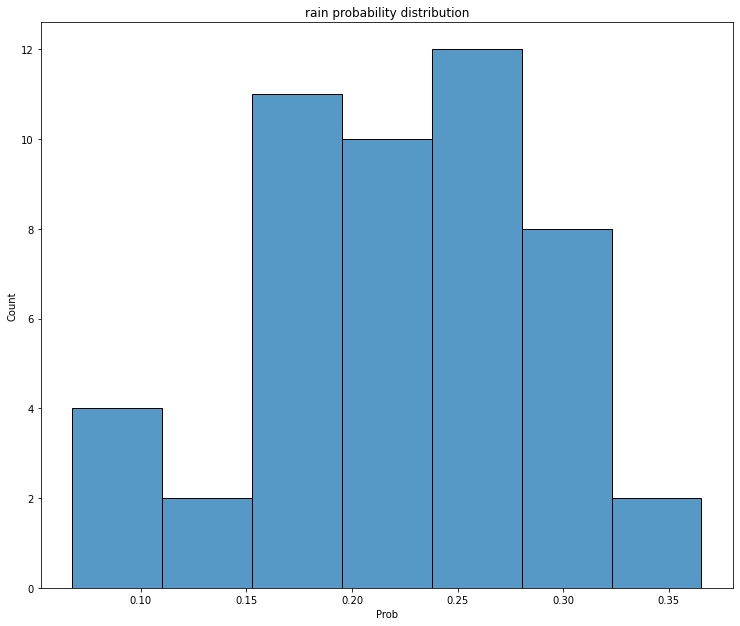

time: 1.13 s (started: 2021-07-02 23:05:31 +08:00)


In [96]:
prob = pd.DataFrame(columns=["Location", "RainCount", "AllCount", "Prob"])

for location in df["Location"].unique():
    rain_count = (df[df["Location"] == location]["RainTomorrow"] == "Yes").sum()
    all_count = df[df["Location"] == location]["RainTomorrow"].count()
    prob_count = rain_count / all_count
    prob = insert_row(prob, [location, rain_count, all_count, prob_count])

print(prob)

_, ax = plt.subplots(figsize=(12.4, 10.4))
ax.set_title("rain probability distribution")
sns.histplot(data=prob, x="Prob", ax=ax)

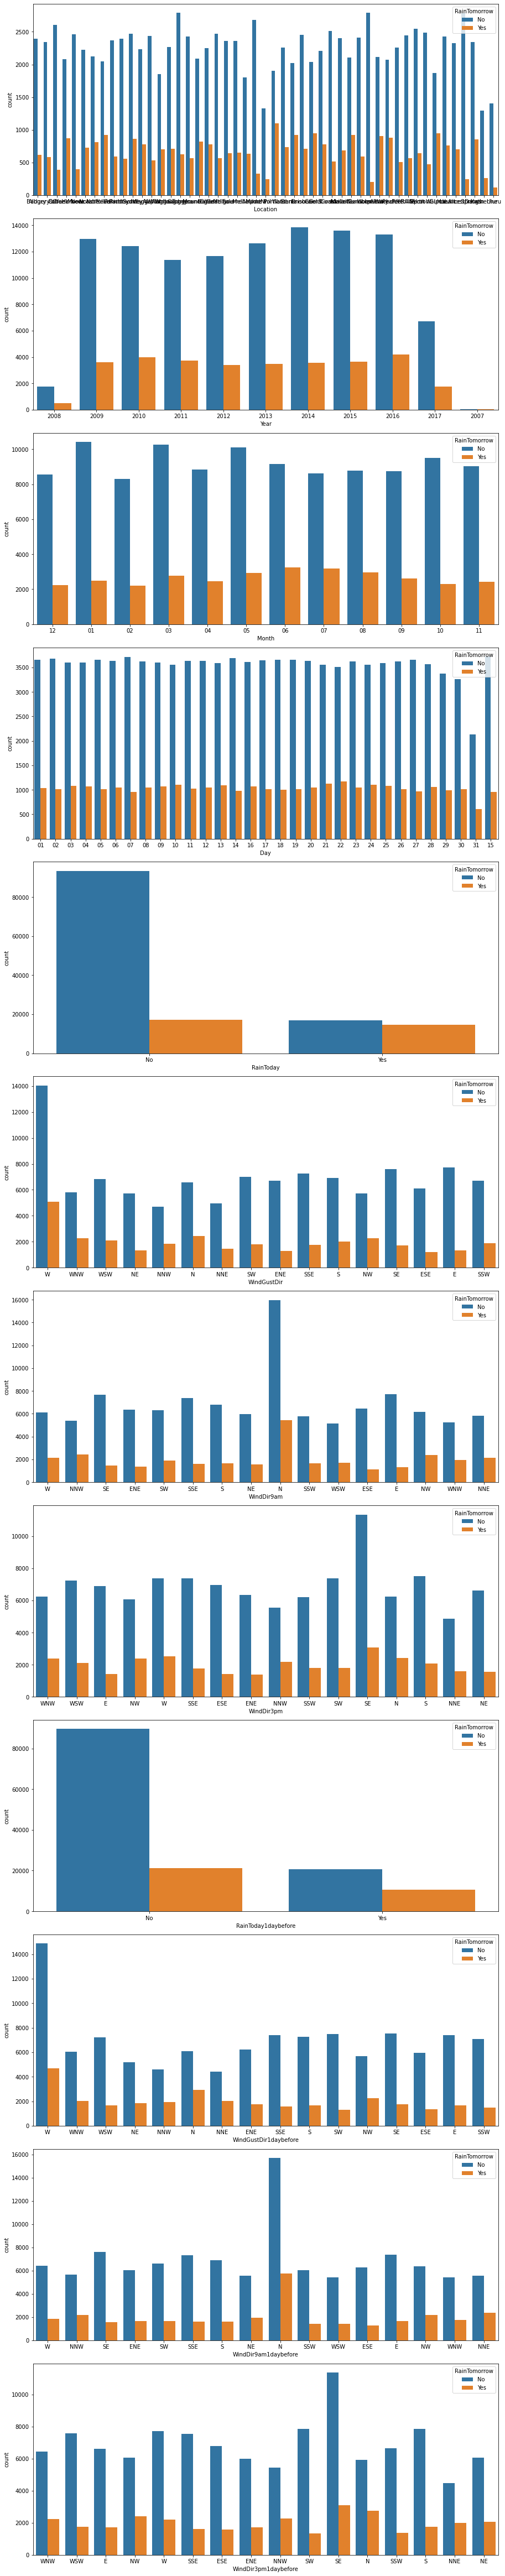

time: 4.64 s (started: 2021-07-02 23:05:32 +08:00)


In [97]:
if draw:
    _, ax = plt.subplots(nrows=len(categorical_features), ncols=1, figsize=(12.8, 5.4*len(categorical_features)))
    ax = ax.flatten()
    for i, feature in enumerate(categorical_features):
        sns.countplot(x=feature, hue=target_feature , data=df, ax=ax[i])
    plt.tight_layout()

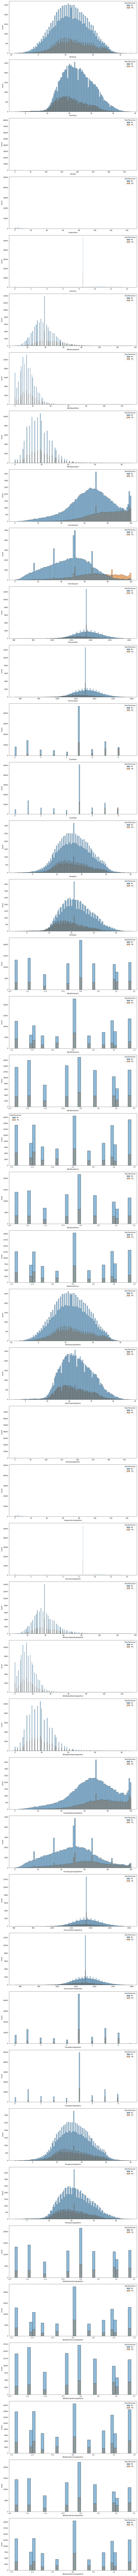

time: 2min 40s (started: 2021-07-02 23:05:37 +08:00)


In [98]:
if draw:
    _, ax = plt.subplots(nrows=len(numerical_features), ncols=1, figsize=(12.8, 5.4*len(numerical_features)))
    ax = ax.flatten()
    for i, feature in enumerate(numerical_features):
        sns.histplot(x=feature, hue=target_feature , data=df, ax=ax[i])
    plt.tight_layout()

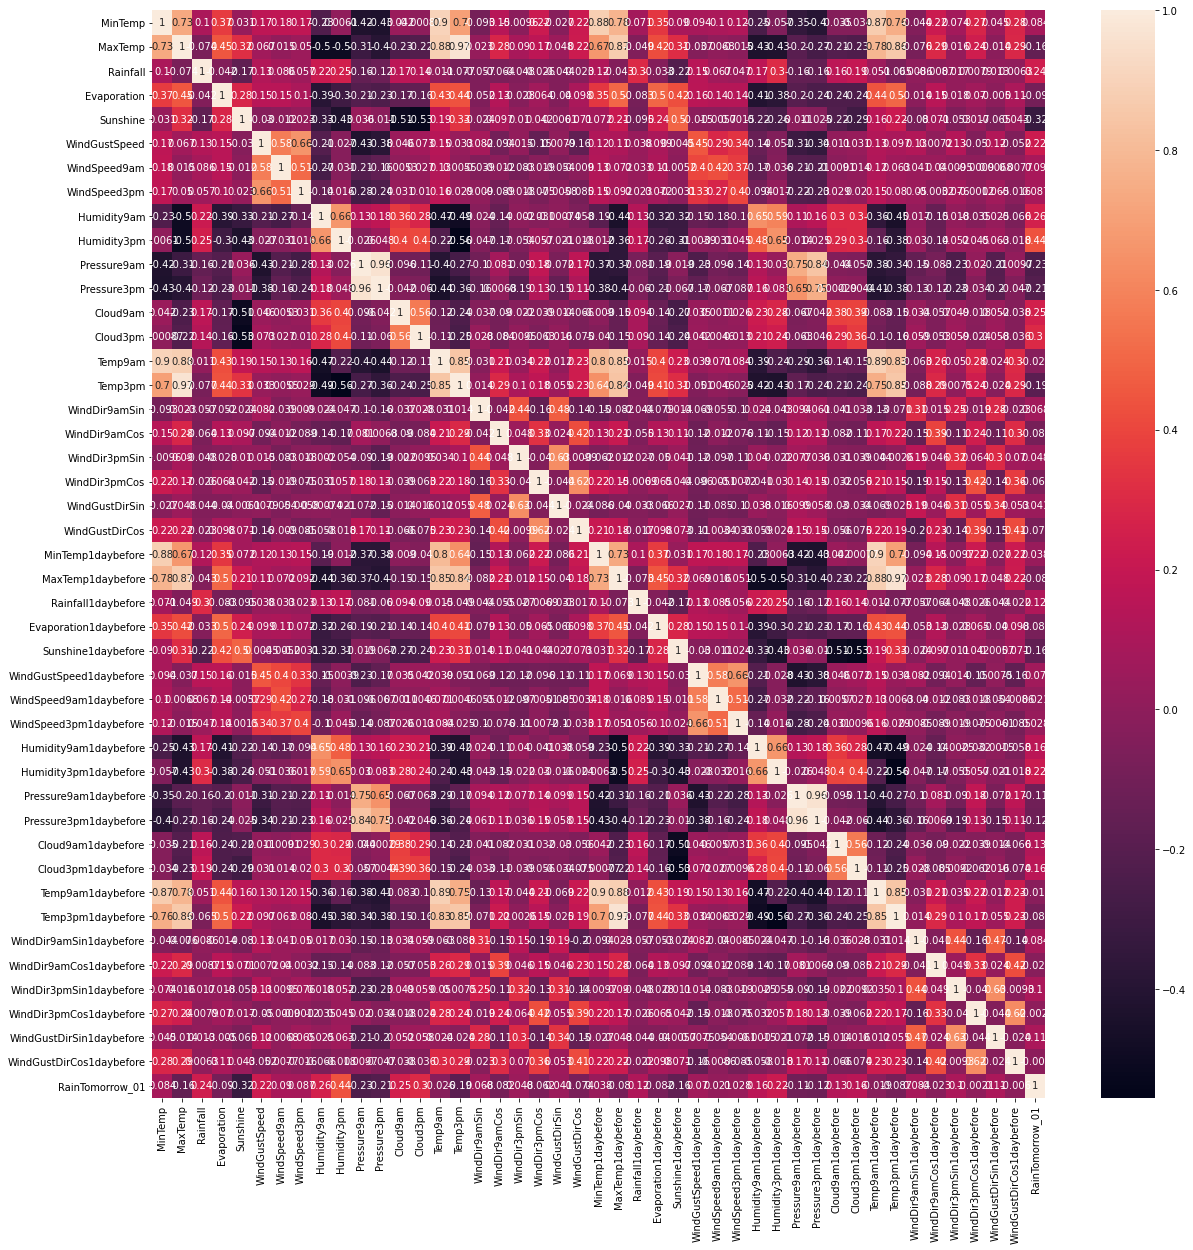

time: 7.84 s (started: 2021-07-02 23:08:17 +08:00)


In [99]:
if draw:
    df[target_feature + "_01"] = df[target_feature].map({"No": 0.0, "Yes": 1.0})
    _, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))
    sns.heatmap(df[numerical_features + [target_feature + "_01"]].corr(), annot=True, ax=ax)

In [100]:
# TRAIN TEST SPLIT
def to_Xy(df, categorical_features, numerical_features, target_feature, onehot=False):
    """one hot encoding for categorical features"""
    df = df.copy()
    # X
    X = []
    for col in categorical_features:
        df[col] = LabelEncoder().fit_transform(df[col])
        if onehot:
            X.append(pd.get_dummies(df[col], prefix=col))
        else:
            X.append(df[col])
    for col in numerical_features:
        df[col] = df[col].astype(np.float64)
        X.append(df[col])
            
    X = pd.concat(X, axis=1)
    
    # y
    if target_feature in df.columns:
        df[target_feature] = LabelEncoder().fit_transform(df[target_feature])
        y = df[target_feature]
    else:
        y = None
    return X, y

X, y = to_Xy(df, categorical_features, numerical_features, target_feature, onehot=False)

time: 719 ms (started: 2021-07-02 23:08:25 +08:00)


In [101]:
X

,Location,Year,Month,Day,RainToday,WindGustDir,WindDir9am,WindDir3pm,RainToday1daybefore,WindGustDir1daybefore,...,Cloud9am1daybefore,Cloud3pm1daybefore,Temp9am1daybefore,Temp3pm1daybefore,WindDir9amSin1daybefore,WindDir9amCos1daybefore,WindDir3pmSin1daybefore,WindDir3pmCos1daybefore,WindGustDirSin1daybefore,WindGustDirCos1daybefore
0,2,1,11,0,0,13,13,14,0,13,...,8.0,5.0,16.9,21.8,0.000000,-1.000000,0.382683,-0.92388,0.000000,-1.000000
1,2,1,11,1,0,14,6,15,0,13,...,8.0,5.0,16.9,21.8,0.000000,-1.000000,0.382683,-0.92388,0.000000,-1.000000
2,2,1,11,2,0,15,13,15,0,14,...,5.0,5.0,17.2,24.3,0.923880,-0.382683,-0.382683,-0.92388,0.382683,-0.923880
3,2,1,11,3,0,4,9,0,0,15,...,5.0,2.0,21.0,23.2,0.000000,-1.000000,-0.382683,-0.92388,-0.382683,-0.923880
4,2,1,11,4,0,13,1,7,0,4,...,5.0,5.0,18.1,26.5,-1.414214,1.414214,0.000000,1.00000,1.414214,1.414214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,41,10,5,19,0,0,2,0,0,0,...,5.0,5.0,11.0,20.3,-0.382683,0.923880,0.000000,1.00000,0.000000,1.000000
145455,41,10,5,20,0,0,9,1,0,0,...,5.0,5.0,9.4,20.9,-0.382683,0.923880,0.000000,1.00000,0.000000,1.000000
145456,41,10,5,21,0,6,9,3,0,0,...,5.0,5.0,10.1,22.4,-1.414214,1.414214,0.382683,0.92388,0.000000,1.000000
145457,41,10,5,22,0,3,9,14,0,6,...,5.0,5.0,10.9,24.5,-1.414214,1.414214,1.000000,0.00000,0.923880,-0.382683


time: 79.3 ms (started: 2021-07-02 23:08:26 +08:00)


In [102]:
y

0         0
1         0
2         0
3         0
4         0
         ..
145454    0
145455    0
145456    0
145457    0
145458    0
Name: RainTomorrow, Length: 142193, dtype: int64

time: 4.23 ms (started: 2021-07-02 23:08:26 +08:00)


# CROSS VALIDATION

In [103]:
def cross_validation(clf, features, k=10, random_state=0):
    kf = KFold(n_splits=k, shuffle=True, random_state=random_state)
    
    auc_test_avg = []
    for train_idx, test_idx in kf.split(np.arange(len(y))):
        # resampling
        X_ = []
        y_ = []
        for label in y.iloc[train_idx].unique():
            X_.append(X.iloc[train_idx, :][y.iloc[train_idx] == label])
            y_.append(y.iloc[train_idx][y.iloc[train_idx] == label])
        n_samples = max(yy.shape[0] for yy in y_)
        for i in range(len(y_)):
            if len(y_[i]) < n_samples:
                X_[i], y_[i] = resample(X_[i], y_[i], n_samples=n_samples, replace=True)

        X_train = pd.concat(X_)
        y_train = pd.concat(y_)
        X_test = X.iloc[test_idx]
        y_test = y.iloc[test_idx]

        # train model
        clf.fit(X_train[features] , y_train)
        y_train_pred = clf.predict_proba(X_train[features])[:, 1]
        auc_train = roc_auc_score(y_train, y_train_pred)
        y_test_pred = clf.predict_proba(X_test[features])[:, 1]
        auc_test = roc_auc_score(y_test, y_test_pred)

        auc_test_avg.append(auc_test)

    auc_test_avg = sum(auc_test_avg) / len(auc_test_avg)
    return auc_test_avg

time: 1.37 ms (started: 2021-07-02 23:08:26 +08:00)


In [104]:
# logistic regression - baseline
categorical_features = ["Location", "Year", "Month", "Day", "RainToday", "WindGustDir", "WindDir9am", "WindDir3pm"]
numerical_features = ["MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm", "WindDir9amSin", "WindDir9amCos", "WindDir3pmSin", "WindDir3pmCos", "WindGustDirSin", "WindGustDirCos"]
features = categorical_features + numerical_features    

auc = cross_validation(
    clf=make_pipeline(StandardScaler(), LogisticRegression(
        max_iter=100,
        random_state=0,
        n_jobs=mp.cpu_count(),
    )),
    features=features,
)
auc

0.8647064580444285

time: 58.8 s (started: 2021-07-02 23:08:26 +08:00)


In [105]:
# logistic regression - without categorical dir
categorical_features = ["Location", "Year", "Month", "Day", "RainToday"]
numerical_features = ["MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm", "WindDir9amSin", "WindDir9amCos", "WindDir3pmSin", "WindDir3pmCos", "WindGustDirSin", "WindGustDirCos"]
features = categorical_features + numerical_features    

auc = cross_validation(
    clf=make_pipeline(StandardScaler(), LogisticRegression(
        max_iter=100,
        random_state=0,
        n_jobs=mp.cpu_count(),
    )),
    features=features,
)
auc

0.8647753348161891

time: 48.4 s (started: 2021-07-02 23:09:25 +08:00)


In [106]:
# logistic regression - without sin cos dir
categorical_features = ["Location", "Year", "Month", "Day", "RainToday", "WindGustDir", "WindDir9am", "WindDir3pm"]
numerical_features = ["MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm"]
features = categorical_features + numerical_features    

auc = cross_validation(
    clf=make_pipeline(StandardScaler(), LogisticRegression(
        max_iter=100,
        random_state=0,
        n_jobs=mp.cpu_count(),
    )),
    features=features,
)
auc

0.8636616416895369

time: 37.7 s (started: 2021-07-02 23:10:13 +08:00)


In [107]:
# logistic regression - without year month date
categorical_features = ["Location", "RainToday", "WindGustDir", "WindDir9am", "WindDir3pm"]
numerical_features = ["MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm", "WindDir9amSin", "WindDir9amCos", "WindDir3pmSin", "WindDir3pmCos", "WindGustDirSin", "WindGustDirCos"]
features = categorical_features + numerical_features    

auc = cross_validation(
    clf=make_pipeline(StandardScaler(), LogisticRegression(
        max_iter=100,
        random_state=0,
        n_jobs=mp.cpu_count(),
    )),
    features=features,
)
auc  

0.8646258237443913

time: 48.1 s (started: 2021-07-02 23:10:51 +08:00)


In [108]:
# logistic regression - 1daybefore
categorical_features = ["Location", "Year", "Month", "Day", "RainToday", "WindGustDir", "WindDir9am", "WindDir3pm"]
numerical_features = ["MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm", "WindDir9amSin", "WindDir9amCos", "WindDir3pmSin", "WindDir3pmCos", "WindGustDirSin", "WindGustDirCos",]
target_feature = "RainTomorrow"

categorical_features.extend(list(map(lambda col: col + "1daybefore", categorical_features)))
for discard in ["Location1daybefore", "Year1daybefore", "Month1daybefore", "Day1daybefore"]:
    categorical_features.remove(discard)

numerical_features.extend(list(map(lambda col: col + "1daybefore", numerical_features)))

features = categorical_features + numerical_features    

auc = cross_validation(
    clf=make_pipeline(StandardScaler(), LogisticRegression(
        max_iter=100,
        random_state=0,
        n_jobs=mp.cpu_count(),
    )),
    features=features,
)
auc

0.8696809009795569

time: 2min 47s (started: 2021-07-02 23:11:39 +08:00)


In [109]:
# xgboost - 1daybefore
categorical_features = ["Location", "Year", "Month", "Day", "RainToday", "WindGustDir", "WindDir9am", "WindDir3pm"]
numerical_features = ["MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm", "WindDir9amSin", "WindDir9amCos", "WindDir3pmSin", "WindDir3pmCos", "WindGustDirSin", "WindGustDirCos",]
target_feature = "RainTomorrow"

categorical_features.extend(list(map(lambda col: col + "1daybefore", categorical_features)))
for discard in ["Location1daybefore", "Year1daybefore", "Month1daybefore", "Day1daybefore"]:
    categorical_features.remove(discard)
    
numerical_features.extend(list(map(lambda col: col + "1daybefore", numerical_features)))

features = categorical_features + numerical_features    

auc = cross_validation(
    clf=XGBClassifier(
        n_estimators=100,
        random_state=0,
        n_jobs=mp.cpu_count(),
        eval_metric="auc",
    ),
    features=features,
)
auc

0.8921641657915467

time: 2min (started: 2021-07-02 23:14:27 +08:00)


# FEATURE IMPORTANCE FROM XGBOOST

In [110]:
# logistic regression - 1daybefore
categorical_features = ["Location", "Year", "Month", "Day", "RainToday", "WindGustDir", "WindDir9am", "WindDir3pm"]
numerical_features = ["MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm", "WindDir9amSin", "WindDir9amCos", "WindDir3pmSin", "WindDir3pmCos", "WindGustDirSin", "WindGustDirCos",]
target_feature = "RainTomorrow"

categorical_features.extend(list(map(lambda col: col + "1daybefore", categorical_features)))
for discard in ["Location1daybefore", "Year1daybefore", "Month1daybefore", "Day1daybefore"]:
    categorical_features.remove(discard)
    
numerical_features.extend(list(map(lambda col: col + "1daybefore", numerical_features)))

features = categorical_features + numerical_features    

# train
clf = XGBClassifier(
    n_estimators=1000,
    random_state=0,
    n_jobs=mp.cpu_count(),
    eval_metric="auc",
)
clf.fit(X , y)

y_pred = clf.predict_proba(X)[:, 1]
auc = roc_auc_score(y, y_pred)
auc

0.9999047044249363

time: 1min 26s (started: 2021-07-02 23:16:27 +08:00)


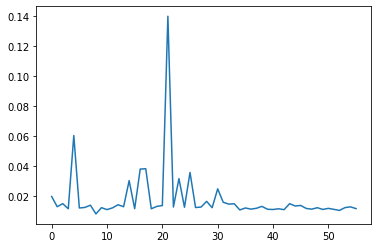

time: 735 ms (started: 2021-07-02 23:17:53 +08:00)


In [111]:
feature_importance = clf.feature_importances_
_, ax = plt.subplots()
ax.plot(np.arange(len(feature_importance)), feature_importance)

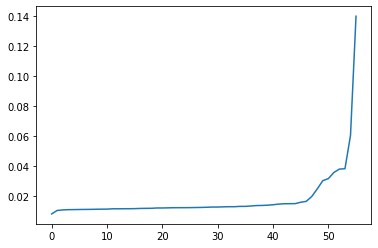

time: 698 ms (started: 2021-07-02 23:17:54 +08:00)


In [112]:
feature_importance = clf.feature_importances_
_, ax = plt.subplots()
ax.plot(np.arange(len(feature_importance)), np.sort(feature_importance))

In [113]:
features = np.array(features)[np.argsort(feature_importance)[::-1]]
features

array(['Humidity3pm', 'RainToday', 'WindGustSpeed', 'Sunshine',
       'Cloud3pm', 'Pressure3pm', 'Rainfall', 'WindDir3pmSin', 'Location',
       'WindDir9amSin', 'WindDir3pmCos', 'Humidity3pm1daybefore', 'Month',
       'WindGustDirCos', 'WindGustDirSin', 'MinTemp', 'WindDir3pm',
       'Pressure3pm1daybefore', 'Humidity9am', 'Pressure9am1daybefore',
       'Sunshine1daybefore', 'WindSpeed3pm', 'Year', 'MaxTemp',
       'WindGustDirSin1daybefore', 'Temp3pm', 'Pressure9am', 'Cloud9am',
       'WindDir9am', 'Temp9am', 'WindDir3pmCos1daybefore',
       'WindGustDir1daybefore', 'WindDir9amCos', 'Temp9am1daybefore',
       'WindDir3pm1daybefore', 'MaxTemp1daybefore', 'WindGustDir',
       'Evaporation1daybefore', 'WindDir9amSin1daybefore',
       'Cloud9am1daybefore', 'WindGustDirCos1daybefore', 'Evaporation',
       'Day', 'WindSpeed9am', 'WindSpeed3pm1daybefore',
       'Rainfall1daybefore', 'Cloud3pm1daybefore',
       'WindGustSpeed1daybefore', 'WindDir9amCos1daybefore',
       'Temp3p

time: 2.17 ms (started: 2021-07-02 23:17:55 +08:00)


In [114]:
def objective(num_features: int, n_estimators: int, max_depth: int, reg_alpha: float, reg_lambda: float):
    chosen_features = features[0: int(round(num_features))]
    auc = cross_validation(
        clf=XGBClassifier(
            n_estimators=int(round(n_estimators)),
            max_depth=int(round(max_depth)),
            reg_alpha=reg_alpha,
            reg_lambda=reg_lambda,
            random_state=0,
            n_jobs=mp.cpu_count(),
            eval_metric="auc",
        ),
        features=chosen_features,
    )
    return auc

time: 671 µs (started: 2021-07-02 23:17:55 +08:00)


In [115]:
pbounds = {
    "num_features": (1, 10),
    "n_estimators": (50, 100),
    "max_depth": (2, 5),
    "reg_alpha": (0.0, 1.0),
    "reg_lambda": (0.0, 1.0),
}


optimizer = BayesianOptimization(
    f=objective,
    pbounds=pbounds,
    random_state=0,
)

optimizer.maximize(n_iter=50)

|   iter    |  target   | max_depth | n_esti... | num_fe... | reg_alpha | reg_la... |
-------------------------------------------------------------------------------------
|  1        |  0.8636   |  3.646    |  85.76    |  6.425    |  0.5449   |  0.4237   |
|  2        |  0.8782   |  3.938    |  71.88    |  9.026    |  0.9637   |  0.3834   |
|  3        |  0.8638   |  4.375    |  76.44    |  6.112    |  0.9256   |  0.07104  |
|  4        |  0.8665   |  2.261    |  51.01    |  8.494    |  0.7782   |  0.87     |
|  5        |  0.8509   |  4.936    |  89.96    |  5.153    |  0.7805   |  0.1183   |
|  6        |  0.8779   |  3.519    |  70.26    |  9.453    |  0.8795   |  0.6801   |
|  7        |  0.8511   |  5.0      |  68.52    |  5.183    |  1.0      |  0.0      |
|  8        |  0.8706   |  2.058    |  71.65    |  9.919    |  0.8269   |  0.8325   |
|  9        |  0.8808   |  4.824    |  70.46    |  9.713    |  0.0371   |  0.9571   |
|  10       |  0.8803   |  5.0      |  66.76    |  10.

In [116]:
optimizer.max

{'target': 0.8820478741285221,
 'params': {'max_depth': 5.0,
  'n_estimators': 95.11837683454318,
  'num_features': 10.0,
  'reg_alpha': 1.0,
  'reg_lambda': 1.0}}

time: 2.95 ms (started: 2021-07-02 23:39:45 +08:00)


# FEATURE IMPORTANCE FROM CATBOOST

In [117]:
# logistic regression - 1daybefore
categorical_features = ["Location", "Year", "Month", "Day", "RainToday", "WindGustDir", "WindDir9am", "WindDir3pm"]
numerical_features = ["MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm", "WindDir9amSin", "WindDir9amCos", "WindDir3pmSin", "WindDir3pmCos", "WindGustDirSin", "WindGustDirCos",]
target_feature = "RainTomorrow"

categorical_features.extend(list(map(lambda col: col + "1daybefore", categorical_features)))
for discard in ["Location1daybefore", "Year1daybefore", "Month1daybefore", "Day1daybefore"]:
    categorical_features.remove(discard)
    
numerical_features.extend(list(map(lambda col: col + "1daybefore", numerical_features)))

features = categorical_features + numerical_features    

# train
clf = CatBoostClassifier(
    iterations=5000,
    random_state=0,
    thread_count=mp.cpu_count(),
    eval_metric="AUC",
    verbose=False,
)
clf.fit(X , y)

y_pred = clf.predict_proba(X)[:, 1]
auc = roc_auc_score(y, y_pred)
auc

0.9377365293752354

time: 1min 44s (started: 2021-07-02 23:39:45 +08:00)


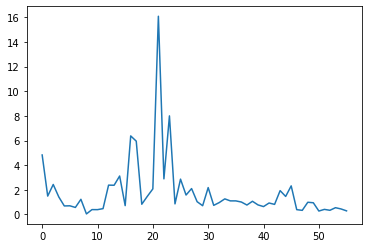

time: 107 ms (started: 2021-07-02 23:41:29 +08:00)


In [118]:
feature_importance = clf.feature_importances_
_, ax = plt.subplots()
ax.plot(np.arange(len(feature_importance)), feature_importance)

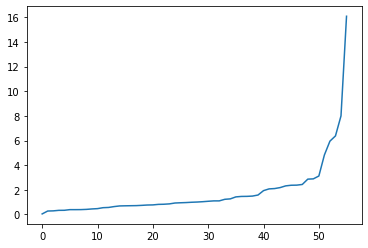

time: 108 ms (started: 2021-07-02 23:41:29 +08:00)


In [119]:
feature_importance = clf.feature_importances_
_, ax = plt.subplots()
ax.plot(np.arange(len(feature_importance)), np.sort(feature_importance))

In [120]:
features = np.array(features)[np.argsort(feature_importance)[::-1]]
features

array(['Humidity3pm', 'Pressure3pm', 'Sunshine', 'WindGustSpeed',
       'Location', 'Rainfall', 'Pressure9am', 'Cloud3pm', 'Month',
       'MinTemp', 'MaxTemp', 'Pressure3pm1daybefore', 'WindDir3pmSin',
       'Temp3pm', 'Humidity9am', 'Humidity3pm1daybefore', 'Temp9am',
       'Year', 'WindSpeed3pm', 'Pressure9am1daybefore', 'Day',
       'WindGustDirCos', 'WindDir3pm', 'MinTemp1daybefore',
       'MaxTemp1daybefore', 'Sunshine1daybefore', 'WindDir9amSin',
       'Rainfall1daybefore', 'Temp9am1daybefore', 'WindGustDirSin',
       'Temp3pm1daybefore', 'WindSpeed3pm1daybefore', 'Cloud9am',
       'WindSpeed9am', 'Humidity9am1daybefore', 'WindGustSpeed1daybefore',
       'Evaporation1daybefore', 'WindDir3pmCos', 'Evaporation',
       'WindDir9amCos', 'WindGustDir', 'RainToday',
       'WindSpeed9am1daybefore', 'WindDir9am', 'WindDir3pmCos1daybefore',
       'WindDir3pm1daybefore', 'WindGustDirSin1daybefore',
       'WindDir9amCos1daybefore', 'WindGustDir1daybefore',
       'WindDir9am1d

time: 2.28 ms (started: 2021-07-02 23:41:29 +08:00)


In [121]:
def objective(num_features: int, iterations: int, depth: int, l2_leaf_reg: float, model_size_reg: float):
    chosen_features = features[0: int(round(num_features))]
    auc = cross_validation(
        clf=CatBoostClassifier(
            iterations=int(round(iterations)),
            depth=int(round(depth)),
            l2_leaf_reg=l2_leaf_reg,
            model_size_reg=model_size_reg,
            random_state=0,
            thread_count=mp.cpu_count(),
            eval_metric="AUC",
            verbose=False,
        ),
        features=chosen_features,
    )
    return auc

time: 652 µs (started: 2021-07-02 23:41:29 +08:00)


In [122]:
pbounds = {
    "num_features": (1, 10),
    "iterations": (250, 500),
    "depth": (2, 5),
    "l2_leaf_reg": (0.0, 1.0),
    "model_size_reg": (0.0, 1.0),
}

optimizer = BayesianOptimization(
    f=objective,
    pbounds=pbounds,
    random_state=0,
)

optimizer.maximize(n_iter=50)

|   iter    |  target   |   depth   | iterat... | l2_lea... | model_... | num_fe... |
-------------------------------------------------------------------------------------
|  1        |  0.8649   |  3.646    |  428.8    |  0.6028   |  0.5449   |  4.813    |
|  2        |  0.8591   |  3.938    |  359.4    |  0.8918   |  0.9637   |  4.451    |
|  3        |  0.8298   |  4.375    |  382.2    |  0.568    |  0.9256   |  1.639    |
|  4        |  0.8617   |  2.261    |  255.1    |  0.8326   |  0.7782   |  8.83     |
|  5        |  0.8299   |  4.936    |  449.8    |  0.4615   |  0.7805   |  2.064    |
|  6        |  0.8625   |  2.859    |  429.7    |  0.1439   |  0.3601   |  4.65     |
|  7        |  0.8755   |  4.772    |  417.9    |  0.7517   |  0.7886   |  10.0     |
|  8        |  0.7942   |  2.435    |  412.2    |  0.5789   |  0.04019  |  1.097    |
|  9        |  0.8689   |  3.004    |  423.5    |  0.0      |  1.0      |  10.0     |
|  10       |  0.8472   |  4.435    |  263.7    |  0.6

In [123]:
optimizer.max

{'target': 0.8772519178334187,
 'params': {'depth': 4.511337138005829,
  'iterations': 488.74517755221814,
  'l2_leaf_reg': 0.1513204891045734,
  'model_size_reg': 0.5931684649553529,
  'num_features': 9.93590157526647}}

time: 1.94 ms (started: 2021-07-03 00:38:43 +08:00)
